In [163]:
import networkx as nx
import nxviz as nv
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.io import savemat
import os
%matplotlib inline

In [204]:
0.5*np.random.randn()

0.4391289358406424

# The examples of networks that may arised from stochastic block models

Aicher, C., Jacobs, A. Z., & Clauset, A. (2015). Learning Latent Block Structure in Weighted Networks. Journal of Complex Networks, 3(2), 221–248. https://doi.org/10.1093/comnet/cnu026


In [228]:
#from here https://github.com/pymc-devs/pymc3/issues/1063
def generate_wsbm(eta, z, stochastic = False):
    G = nx.Graph()
    k = eta.shape[0]
    n = len(z)
    for i in range(n):
        G.add_node(i, group = str(z[i]), size = 5)
    for i in range(n):
        
        for j in range(i, n):
            # skip selfloop
            eta_e = eta[z[i], z[j]]
            # if weighted sample edge from Poisson
            # otherwise, sample from Bernoulli
            if stochastic:
                w_e = np.random.poisson(eta_e)#+np.random.randn()
            else:
                w_e = eta_e
            # we add an edge if the weight is greater than 0
            if w_e > 0:
                G.add_edge(i, j, weight=w_e,wtype = str(z[i])+str(z[j]))
    return G   

## Assortative network example

In [229]:
k = 4
n = 16
eta = np.array([
               [20, 1, 1,1], 
               [1, 20, 1,1], 
               [1, 1, 20,1],
               [1, 1, 1,20],
              ])
z = np.array([i // (n // k) for i in range(n)]) # split the graph evenly

def plot_graph(z, eta, stochastic = True):
    G = generate_wsbm(eta, z, stochastic = stochastic)
    fig,axs = plt.subplots(1,2, figsize = (12,6))

    c = nv.CircosPlot(G, node_grouping='group',node_color = 'group',
                      edge_width = 'weight', edge_color = 'wtype',node_labels = True)
    plt.close(); # remove the figure automatically created by nv
    c.figure=fig;
    axs[0].axis('off');
    c.ax=axs[0];
    c.draw();
    mt = nv.MatrixPlot(G, node_grouping='group',node_color = 'group',
                      edge_width = 'weight', edge_color = 'wtype')
    plt.close(); # remove the figure automatically created by nv
    mt.figure=fig;
    #axs[1].axis('off');
    mt.ax=axs[1];
    mt.draw();
    plt.show(); 
    return G


In [230]:
matdict = dict()

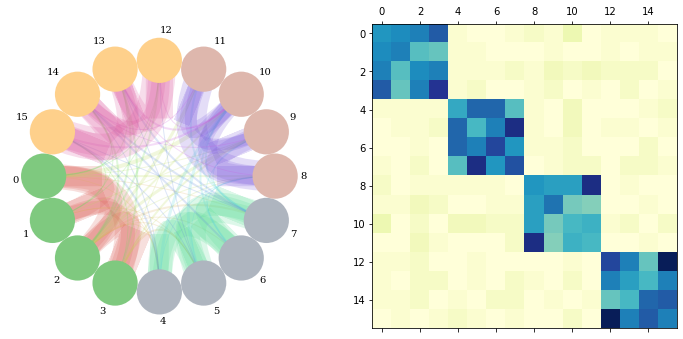

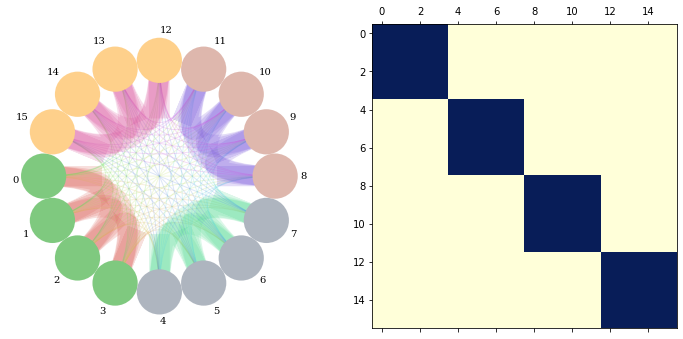

In [231]:
Gs = plot_graph(z, eta, stochastic = True)
Gd = plot_graph(z, eta, stochastic = False)

In [232]:
AssortS = nx.convert_matrix.to_numpy_matrix(Gs)
AssortD = nx.convert_matrix.to_numpy_matrix(Gd)
matdict['AssortD'] = AssortD
matdict['AssortS'] = AssortS

#savemat('WSBM/test_matrices/sim_data.mat',{'AssortD': AssortMatrixD, 'AssortS': AssortMatrixS})

## Dissortative network example

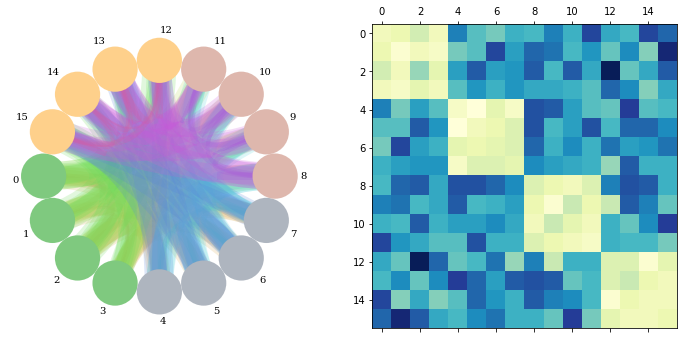

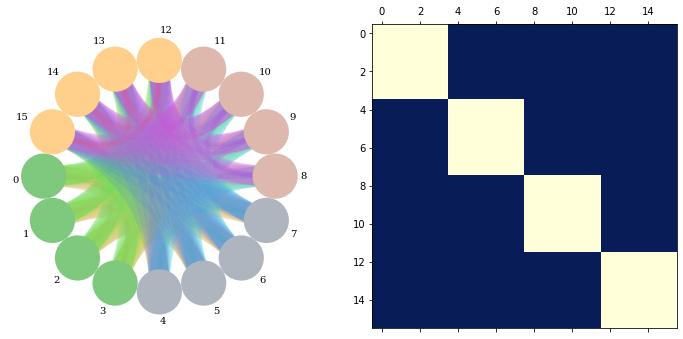

In [233]:
eta = np.array([
               [5, 20, 20,20], 
               [20, 5, 20,20], 
               [20, 20, 5,20],
               [20, 20, 20,5],
              ])
Gs = plot_graph(z, eta, stochastic = True)
Gd = plot_graph(z, eta, stochastic = False)

In [234]:
DissortS = nx.convert_matrix.to_numpy_matrix(Gs)
DissortD = nx.convert_matrix.to_numpy_matrix(Gd)
matdict['DissortD'] = DissortD
matdict['DissortS'] = DissortS

# Core-periphery

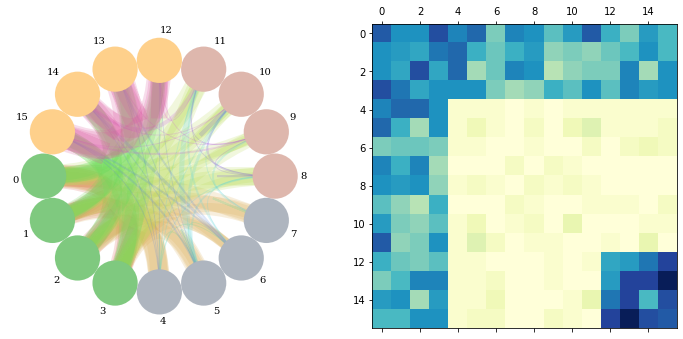

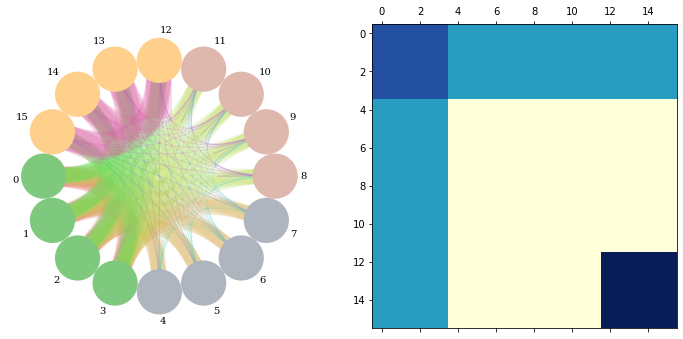

In [235]:
eta = np.array([
               [20, 15,15,15], 
               [15, 1, 1,1], 
               [15, 1, 1,1],
               [15, 1, 1,25],
              ])
Gs = plot_graph(z, eta, stochastic = True)
Gd = plot_graph(z, eta, stochastic = False)

In [236]:
CorePS = nx.convert_matrix.to_numpy_matrix(Gs)
CorePD = nx.convert_matrix.to_numpy_matrix(Gd)
matdict['CorePD'] = CorePD
matdict['CorePS'] = CorePS

## Ordered

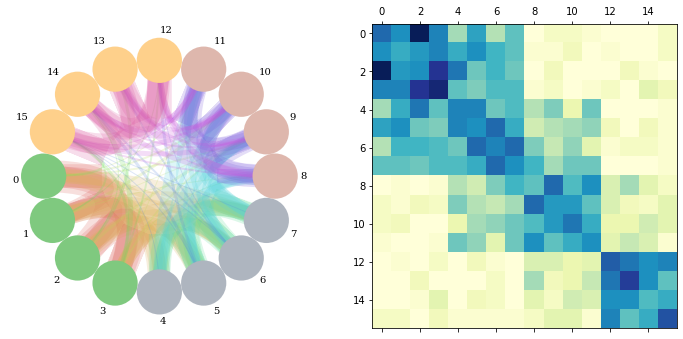

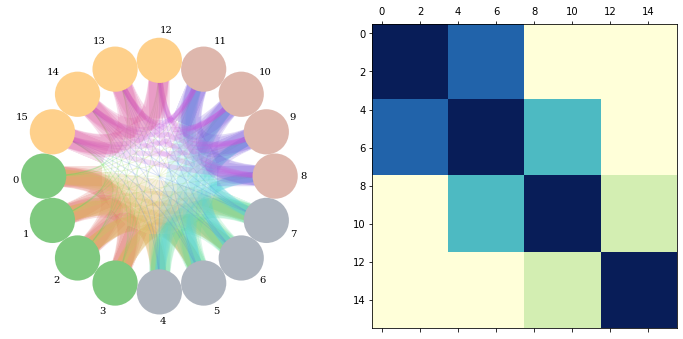

In [237]:
eta = np.array([
               [20, 15, 1,  1 ], 
               [15, 20, 10, 1 ], 
               [1,  10, 20, 5],
               [1,  1,  5, 20],
              ])
Gs = plot_graph(z, eta, stochastic = True)
Gd = plot_graph(z, eta, stochastic = False)

In [238]:
OrderedS = nx.convert_matrix.to_numpy_matrix(Gs)
OrderedD = nx.convert_matrix.to_numpy_matrix(Gd)
matdict['OrderedD'] = OrderedD
matdict['OrderedS'] = OrderedS

## Hierarhical structure


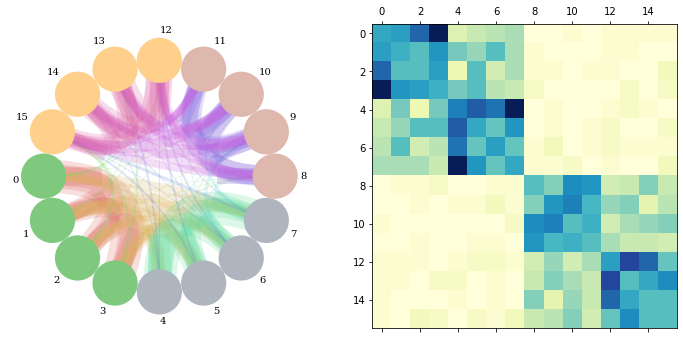

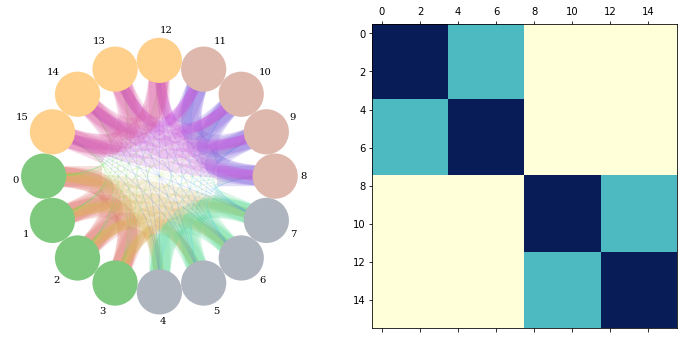

In [241]:
eta = np.array([
               [20, 10, 1,  1 ], 
               [10, 20, 1, 1 ], 
               [1,  1, 20, 10],
               [1,  1,  10, 20],
              ])
Gs = plot_graph(z, eta, stochastic = True)
Gd = plot_graph(z, eta, stochastic = False)

In [242]:
HierarS = nx.convert_matrix.to_numpy_matrix(Gs)
HierarD = nx.convert_matrix.to_numpy_matrix(Gd)
matdict['HierarD'] = HierarD
matdict['HierarS'] = HierarS

## One dominant block

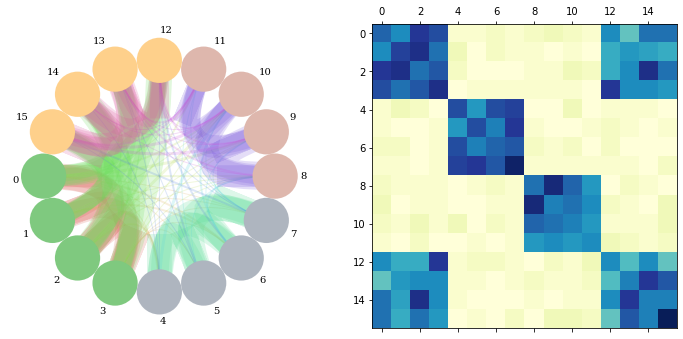

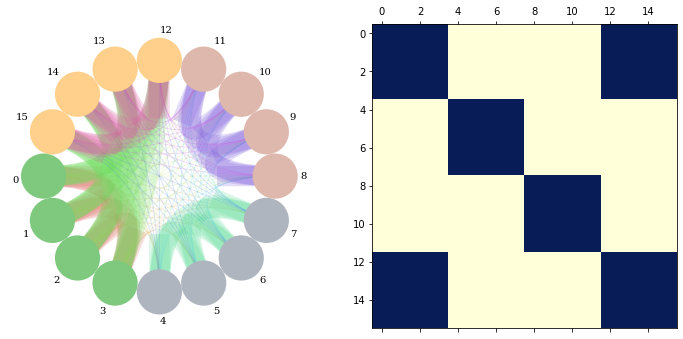

In [248]:
eta = np.array([
               [20, 1, 1,  20 ], 
               [1, 20, 1, 1 ], 
               [1,  1, 20, 1],
               [20,  1,  1, 20],
              ])
Gs = plot_graph(z, eta, stochastic = True)
Gd = plot_graph(z, eta, stochastic = False)

In [246]:
DominS = nx.convert_matrix.to_numpy_matrix(Gs)
DominD = nx.convert_matrix.to_numpy_matrix(Gd)
matdict['DominD'] = DominD
matdict['DominS'] = DominS

In [247]:
savemat('WSBM/test_matrices/sim_data.mat',matdict)